### Kode ini mengimplementasikan beberapa teknik pengolahan citra untuk mendeteksi nominal uang rupiah.
Teknik yang digunakan meliputi:
1. **Preprocessing Citra**: Konversi ke Grayscale
2. **Ekstraksi Fitur**: Edge Detection dengan Canny
3. **Segmentasi Citra**: K-Means Clustering

Dataset berhasil diunduh: /root/.cache/kagglehub/datasets/fannyzahrahramadhan/rupiah-kertas-2022/versions/1
Items in data_path: ['Uang Baru']
Found image file: /root/.cache/kagglehub/datasets/fannyzahrahramadhan/rupiah-kertas-2022/versions/1/Uang Baru/50 K/WhatsApp Image 2023-07-30 at 11.04.13.jpeg
Using image_path: /root/.cache/kagglehub/datasets/fannyzahrahramadhan/rupiah-kertas-2022/versions/1/Uang Baru/50 K/WhatsApp Image 2023-07-30 at 11.04.13.jpeg


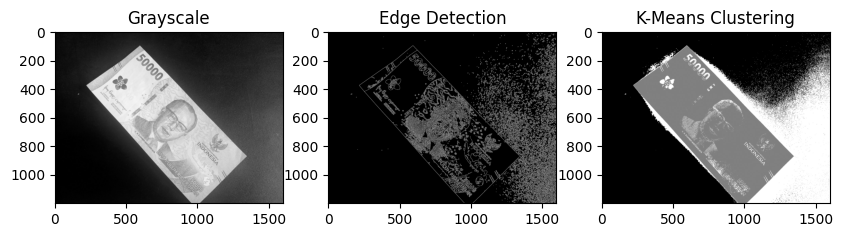

In [10]:
"""
# Deteksi Nominal Uang Menggunakan Pengolahan Citra Digital

Kode ini mengimplementasikan beberapa teknik pengolahan citra untuk mendeteksi nominal uang rupiah.
Teknik yang digunakan meliputi:
1. **Preprocessing Citra**: Konversi ke Grayscale
2. **Ekstraksi Fitur**: Edge Detection dengan Canny
3. **Segmentasi Citra**: K-Means Clustering
4. **Klasifikasi**: CNN untuk mengenali nominal uang
"""

# **1. Instalasi dan Import Library**
"""
Langkah pertama adalah memastikan bahwa semua library yang dibutuhkan sudah terinstal.
"""
!pip install opencv-python-headless
!pip install matplotlib
!pip install kagglehub

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
import kagglehub

# **2. Load Dataset dari Kaggle**
"""
Dataset diambil langsung dari Kaggle menggunakan `kagglehub`.
"""

# Download dataset dari Kaggle
dataset_path = kagglehub.dataset_download("fannyzahrahramadhan/rupiah-kertas-2022")
print("Dataset berhasil diunduh:", dataset_path)

# Path dataset yang sudah diunduh dari Kaggle
# The dataset is directly in the dataset_path, not in a subfolder
data_path = dataset_path  # Removing subfolder assumption

# **3. Preprocessing: Konversi ke Grayscale**
"""
Fungsi ini membaca gambar dari path yang diberikan dan mengubahnya menjadi grayscale.
Grayscale digunakan untuk menyederhanakan data dan mempermudah ekstraksi fitur.
"""
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    # Check if the image was loaded correctly
    if img is None:
        raise ValueError(f"Error loading image from {image_path}. "
                         f"Please ensure the file exists and is a valid image.")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, img_gray

# **4. Ekstraksi Fitur: Edge Detection (Canny)**
"""
Fungsi ini mendeteksi tepi pada gambar menggunakan Canny Edge Detection.
Edge detection berguna untuk menyoroti batas-batas penting pada uang kertas.
"""
def edge_detection(img_gray):
    edges = cv2.Canny(img_gray, 50, 150)
    return edges

# **5. Segmentasi: K-Means Clustering**
"""
Fungsi ini melakukan segmentasi citra menggunakan algoritma K-Means Clustering.
Segmentasi membantu dalam membagi area citra berdasarkan kemiripan warna atau intensitas piksel.
"""
def kmeans_segmentation(img_gray, k=3):
    img_reshape = img_gray.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(img_reshape)
    segmented_img = kmeans.labels_.reshape(img_gray.shape)
    return segmented_img

# **6. Klasifikasi: CNN**
"""
Model CNN digunakan untuk mengklasifikasikan nominal uang berdasarkan fitur yang telah diekstrak.
Arsitektur CNN mencakup beberapa lapisan konvolusi dan pooling untuk mendeteksi pola penting.
"""
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 Kelas untuk nominal uang
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **7. Contoh Penggunaan**
"""
Di sini kita mencoba menjalankan semua langkah pada gambar contoh dari dataset.
"""
# Check if the data_path exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset path not found: {data_path}")

# List all files and directories in the data_path directory
items_in_data_path = os.listdir(data_path)
print("Items in data_path:", items_in_data_path)

# Find the first image file within the dataset directory and its subdirectories
image_path = None  # Initialize image_path
for root, _, files in os.walk(data_path): # walk through all subdirectories
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')): # Check if it's an image file
            image_path = os.path.join(root, file)
            print("Found image file:", image_path)
            break  # Stop searching once an image is found
    if image_path:  # If an image was found in this subdirectory, break outer loop
        break
else:  # This else block executes if the outer loop completes without finding an image
    raise FileNotFoundError("No image files found in the dataset directory or its subdirectories.")

print("Using image_path:", image_path) # Print the image_path to verify it's correct

img, img_gray = preprocess_image(image_path)
edges = edge_detection(img_gray)
kmeans_result = kmeans_segmentation(img_gray)

# **8. Visualisasi Hasil**
"""
Menampilkan hasil setiap tahap pengolahan citra: grayscale, edge detection, dan segmentasi K-Means.
"""
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.subplot(1,3,3)
plt.imshow(kmeans_result, cmap='gray')
plt.title("K-Means Clustering")
plt.show()

4. **Klasifikasi**: CNN untuk mengenali nominal uang

In [14]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.cluster import KMeans
import kagglehub

# **1. Load Dataset dari Kaggle**
dataset_path = kagglehub.dataset_download("fannyzahrahramadhan/rupiah-kertas-2022")
print("Dataset berhasil diunduh:", dataset_path)
data_path = dataset_path

# **2. Fungsi Preprocessing**
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error loading image: {image_path}")
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (128, 128))
    return img, img_gray, img_resized

def edge_detection(img_gray):
    return cv2.Canny(img_gray, 50, 150)

def kmeans_segmentation(img_gray, k=3):
    img_reshape = img_gray.reshape((-1, 1))
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(img_reshape)
    return kmeans.labels_.reshape(img_gray.shape)

# **3. Klasifikasi CNN**
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 kelas nominal uang
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **4. Load Data untuk Training**
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    data_path, target_size=(128, 128), batch_size=32,
    class_mode='sparse', subset='training',
    color_mode='grayscale')  # Changed to grayscale
val_generator = datagen.flow_from_directory(
    data_path, target_size=(128, 128), batch_size=32,
    class_mode='sparse', subset='validation',
    color_mode='grayscale')  # Changed to grayscale
# **5. Training Model**
cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)

# **6. Prediksi dengan CNN**
def predict_nominal(image_path):
    _, _, img_resized = preprocess_image(image_path)
    img_resized = img_resized.reshape(1, 128, 128, 1) / 255.0
    prediction = cnn_model.predict(img_resized)
    nominal = np.argmax(prediction)
    label_mapping = {0: "50000", 1: "100000", 2: "20000", 3: "10000", 4: "5000", 5: "2000"}
    return label_mapping[nominal]

# **7. Uji Model**
for root, _, files in os.walk(data_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            test_image = os.path.join(root, file)
            break

print("Prediksi Nominal Uang:", predict_nominal(test_image))


Dataset berhasil diunduh: /root/.cache/kagglehub/datasets/fannyzahrahramadhan/rupiah-kertas-2022/versions/1
Found 1324 images belonging to 1 classes.
Found 330 images belonging to 1 classes.
Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9044 - loss: 0.1889 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 1.0000 - loss: 8.9185e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/1